<a href="https://colab.research.google.com/github/Lucky920487/Placement-project-logistic-regression/blob/main/End_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [7]:
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [9]:
df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
import matplotlib.pyplot as plt

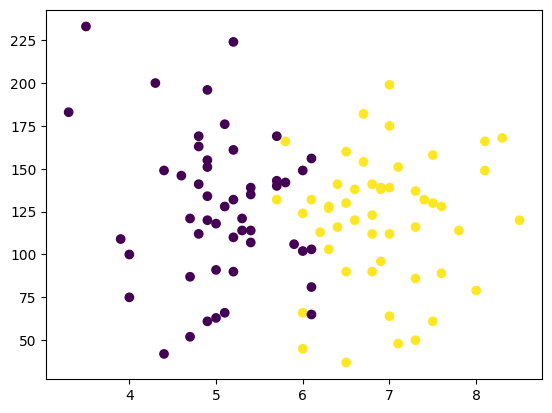

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [15]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y.shape

(100,)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [24]:
X_train

,cgpa,iq
53,8.3,168.0
80,4.9,196.0
49,5.4,135.0
74,6.7,154.0
22,4.9,120.0
...,...,...
62,6.0,102.0
5,7.1,48.0
89,4.9,151.0
99,6.2,113.0


In [25]:
y_train

,placement
53,1
80,0
49,0
74,1
22,0
...,...
62,0
5,1
89,0
99,1


In [26]:
X_test

,cgpa,iq
40,4.9,134.0
55,7.8,114.0
1,5.9,106.0
71,6.1,132.0
27,6.0,124.0
82,6.5,37.0
48,6.6,138.0
10,6.0,45.0
98,6.3,103.0
9,5.1,66.0


In [27]:
y_test

,placement
40,0
55,1
1,0
71,1
27,1
82,1
48,1
10,1
98,1
9,0


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [33]:
x_train = scaler.fit_transform(X_train)

In [34]:
x_train

array([[ 1.98366296,  1.06282259],
       [-0.91925844,  1.77495047],
       [-0.49235824,  0.22352903],
       [ 0.6175823 ,  0.70675866],
       [-0.91925844, -0.15796805],
       [ 0.95910246,  0.63045924],
       [-0.49235824, -0.31056688],
       [ 2.15442304, -0.15796805],
       [ 0.87372242, -0.36143316],
       [ 0.10530205, -1.14986045],
       [-1.68767881, -0.66663082],
       [ 0.87372242, -1.5822238 ],
       [-0.15083807,  0.401561  ],
       [ 0.70296234, -0.36143316],
       [ 0.6175823 ,  1.41888653],
       [ 0.78834238,  0.29982844],
       [ 0.10530205,  0.75762493],
       [-1.34615865, -2.14175284],
       [ 0.01992201,  0.57959297],
       [-1.34615865,  0.57959297],
       [-2.2853391 ,  1.44431967],
       [-1.00463848, -0.36143316],
       [-0.66311832,  0.14722961],
       [ 1.12986254, -0.2597006 ],
       [-1.00463848,  1.08825573],
       [-1.68767881, -1.30245928],
       [ 0.70296234, -0.9209622 ],
       [-0.91925844,  0.7321918 ],
       [-1.00463848,

In [37]:
x_test = scaler.transform(X_test)

In [38]:
x_test

array([[-0.91925844,  0.19809589],
       [ 1.55676275, -0.31056688],
       [-0.06545803, -0.51403199],
       [ 0.10530205,  0.14722961],
       [ 0.01992201, -0.05623549],
       [ 0.44682222, -2.26891854],
       [ 0.53220226,  0.29982844],
       [ 0.01992201, -2.06545343],
       [ 0.27606213, -0.5903314 ],
       [-0.74849836, -1.53135752]])

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression()

In [86]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [87]:
# model evaluation
y_pred = clf.predict(x_test)

In [88]:
y_test

,placement
40,0
55,1
1,0
71,1
27,1
82,1
48,1
10,1
98,1
9,0


In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test,y_pred)

0.8

In [91]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

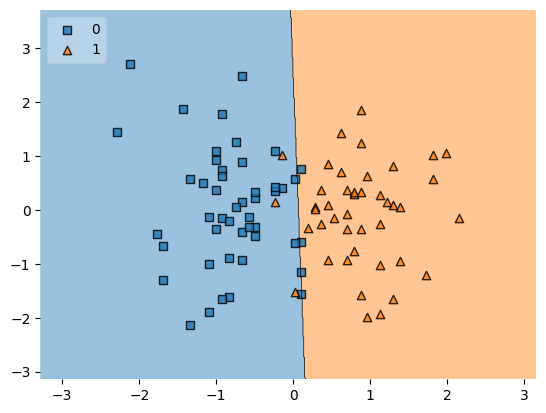

In [92]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [93]:
import pickle

In [94]:
pickle.dump(clf,open('model.pkl','wb'))